#Augmented Perspective

This iPython Notebook runs the the Augmented Perspective experiment flow

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where your augmented perspective repo is checked out
# e.g. 'projects/augmented-perspective':
# if FOLDERNAME, current directory of the iPython notebook will be used
FOLDERNAME = 'augmented-perspective'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cd $FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive
/content/drive/.shortcut-targets-by-id/1g15eqMB8VyviBypnBlOVm8H-tu-OksvO/augmented-perspective


Then, you should be able to run the following with no problem.

In [ ]:
%load_ext autoreload
%autoreload 2

import importlib
import sys

# pre-import everything to save time
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import torch

!nvidia-smi
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
    torch.cuda.empty_cache()
print("Using {} for computation".format(device))

Sat Mar 19 04:55:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# try import project libraries
import augmented_perspective
import calibration
import depth_model

Run the depth model with GPU againsts assets/kitti2.png

In [ ]:
importlib.reload(depth_model)
argv = ["runner.py", "--image_path", "assets/kitti2.png", "--device", device]
depth_model.run_depth_model(argv)

before ['/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-db57ee4b-7182-49bb-acae-6b98bec85b9c.json']
after ['runner.py', '--image_path', 'assets/kitti2.png', '--device', 'cuda']
Namespace(boosting=True, device='cuda', image_files=['kitti2.png'], image_path='../../assets', model_name='mono_1024x320', monodepth2=True, output_path='../../outputs/')
-> Loading model from  models/mono_1024x320
   Loading pretrained encoder
   Loading pretrained decoder
Reading images from ../../assets
-> Predicting on 1 test images
input_image.shape:  torch.Size([1, 3, 320, 1024])
disp.shape:  torch.Size([1, 1, 320, 1024])
disp_resized.shape:  torch.Size([1, 1, 370, 1224])
scaled_disp.shape:  torch.Size([1, 1, 320, 1024])
[[4.9915996 5.091959  5.1896105 ... 3.1745822 3.1612873 3.1302292]
 [5.0030622 5.1008735 5.1998634 ... 3.168944  3.1556315 3.1273923]
 [5.007049  5.097818  5.19861   ... 3.1896892 3.1729252 3.1429288]
 ...
 [1.812802  1.815973

Downloading: "https://github.com/facebookresearch/WSL-Images/archive/main.zip" to /root/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /root/.cache/torch/hub/checkpoints/ig_resnext101_32x8-c38310e5.pth


  0%|          | 0.00/340M [00:00<?, ?B/s]

start processing
processing image 0 : kitti2
	 wholeImage being processed in : 1920
 	 	 DEBUG| GPU THRESHOLD REACHED 1920 ---> 1568
Adjust factor is: 1.3008887614678901
Selecting patchs ...
Target resolution:  (1510, 4995, 3)
Dynamicly change merged-in resolution; scale: 0.24503311258278146
	 Resulted depthmap res will be : (370, 1224)
patchs to process: 29
	 processing patch 0 | [  2   2 329 329]
	 processing patch 1 | [ 73   2 329 329]
	 processing patch 2 | [143   2 329 329]
	 processing patch 3 | [214   2 329 329]
	 processing patch 4 | [284   2 329 329]
	 processing patch 5 | [355   2 329 329]
	 processing patch 6 | [425   2 329 329]
	 processing patch 7 | [496   2 329 329]
	 processing patch 8 | [107 107 259 259]
	 processing patch 9 | [177 107 259 259]
	 processing patch 10 | [248 107 259 259]
	 processing patch 11 | [319 107 259 259]
	 processing patch 12 | [389 107 259 259]
	 processing patch 13 | [460 107 259 259]
	 processing patch 14 | [530 107 259 259]
	 processing patch 

In [ ]:
original_image = io.imread("assets/kitti3.png")
depth_image_after_monodepth2 = io.imread("outputs/kitti3_monodepth2_depth.png")
depth_map_after_monodepth2 = np.load("outputs/kitti3_monodepth2_depth.npy")
io.imsave("outputs/kitti3_monodepth2_depth_greyscale.png", depth_map_after_monodepth2)
print("Depth Map Size After Monodepth:{}".format(depth_map_after_monodepth2.shape))
depth_image_after_boosting = io.imread("outputs/kitti3_boosting_depth.png")
depth_map_after_boosting = np.load("outputs/kitti3_boosting_depth.npy")
io.imsave("outputs/kitti3_boosting_depth_greyscale.png", depth_map_after_boosting)
print("Depth Map Size After Boosting:{}".format(depth_map_after_boosting.shape))

Depth Map Size After Monodepth:(375, 1242)


Depth Map Size After Boosting:(375, 1242)


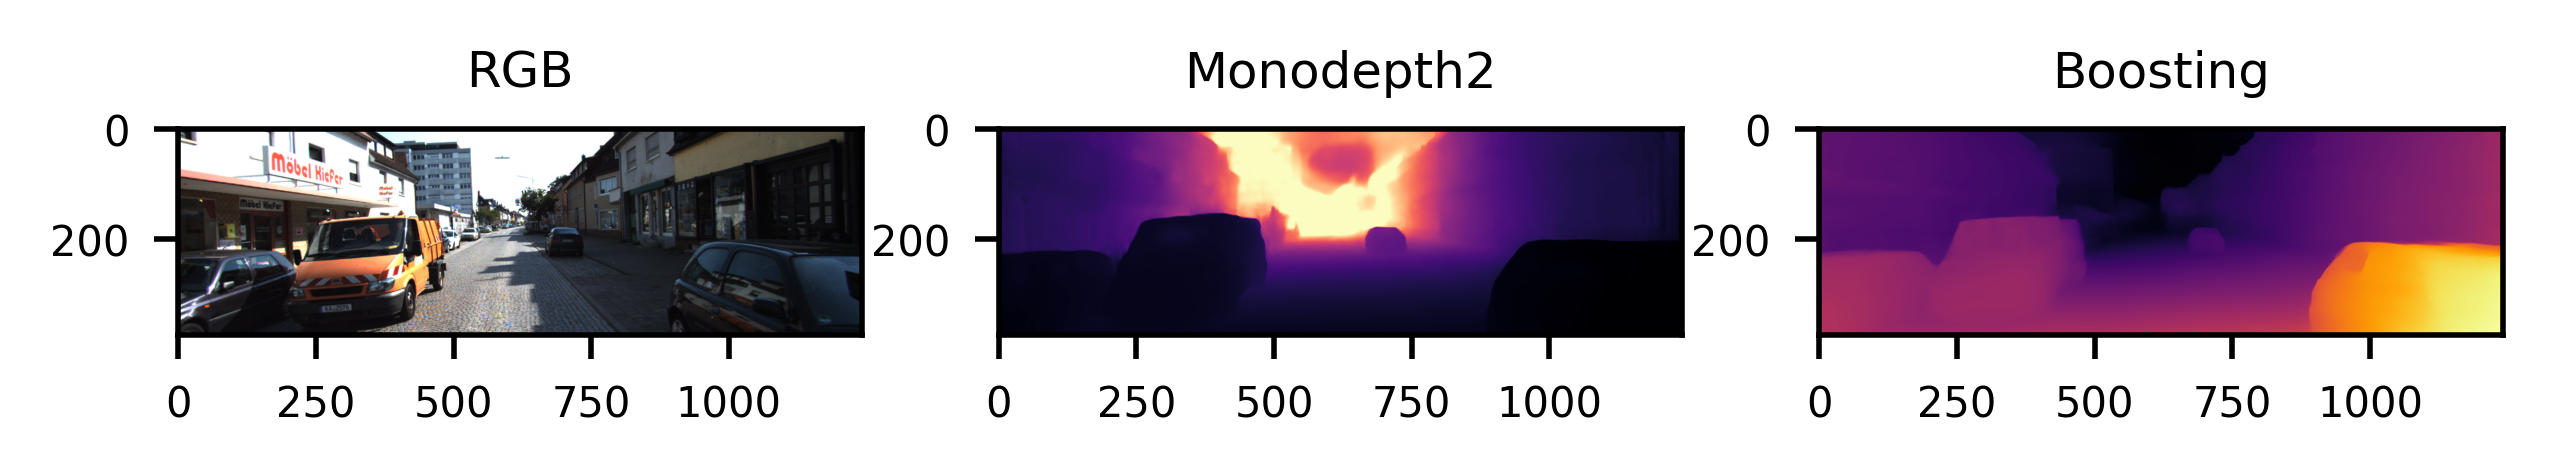

In [ ]:
plt.rcParams.update({'font.size': 6})
f, ax = plt.subplots(1, 3, dpi=500)
ax[0].imshow(original_image)
ax[0].title.set_text('RGB')
ax[1].imshow(depth_image_after_monodepth2)
ax[1].title.set_text('Monodepth2')
ax[2].imshow(depth_image_after_boosting)
ax[2].title.set_text('Boosting')

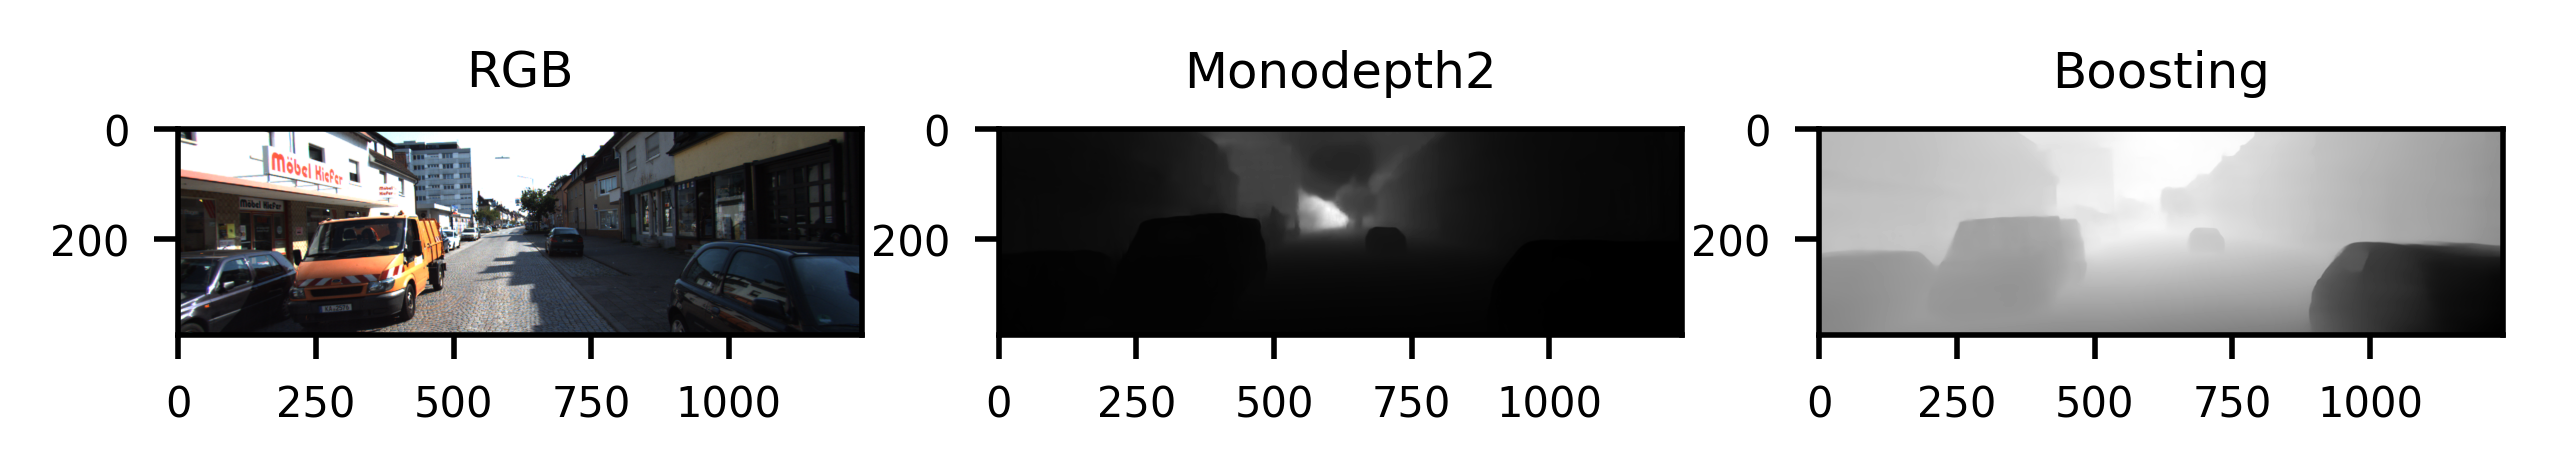

In [ ]:
plt.rcParams.update({'font.size': 6})
f, ax = plt.subplots(1, 3, dpi=500)
ax[0].imshow(original_image)
ax[0].title.set_text('RGB')
ax[1].imshow(depth_map_after_monodepth2, cmap='gray')
ax[1].title.set_text('Monodepth2')
ax[2].imshow(depth_map_after_boosting, cmap='gray')
ax[2].title.set_text('Boosting')

Run the augmented perspective code againsts assets/kitti2.png

In [ ]:
importlib.reload(augmented_perspective)
argv = ["runner.py", "--image_path", "assets/kitti2.png", "--monodepth2"]
augmented_perspective.run_augmented_perspective(argv)

argv = ["runner.py", "--image_path", "assets/kitti2.png", "--boosting"]
augmented_perspective.run_augmented_perspective(argv)

RT
 [[ 0.96592583  0.          0.25881905 -0.3       ]
 [ 0.          1.          0.          0.        ]
 [-0.25881905  0.          0.96592583  0.        ]
 [ 0.          0.          0.          1.        ]]
Start reprojection
Saving image (370, 1224, 3) to output_images/kitti2_monodepth2_depth_reprojected.png
Time taken: 12.525381088256836 seconds
Average time per frame: 12.525381088256836 seconds
RT
 [[ 0.96592583  0.          0.25881905 -0.3       ]
 [ 0.          1.          0.          0.        ]
 [-0.25881905  0.          0.96592583  0.        ]
 [ 0.          0.          0.          1.        ]]
Start reprojection
Saving image (370, 1224, 3) to output_images/kitti2_boosting_depth_reprojected.png
Time taken: 12.917273998260498 seconds
Average time per frame: 12.917273998260498 seconds


In [ ]:
reprojected_image_after_boosting = io.imread("output_images/kitti2_boosting_depth_reprojected.png")
reprojected_image_after_monodepth2 = io.imread("output_images/kitti2_monodepth2_depth_reprojected.png")
plt.rcParams.update({'font.size': 6})
f, ax = plt.subplots(1, 3, dpi=500)
ax[0].imshow(original_image)
ax[0].title.set_text('RGB')
ax[1].imshow(reprojected_image_after_monodepth2)
ax[1].title.set_text('Monodepth2')
ax[2].imshow(reprojected_image_after_boosting)
ax[2].title.set_text('Boosting')

Output hidden; open in https://colab.research.google.com to view.

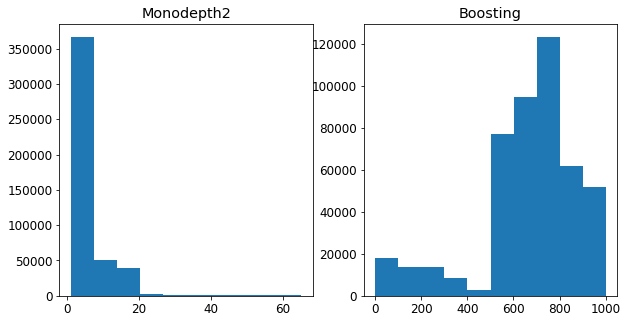

In [ ]:
def draw_histogram(ax, data):
    counts, bins = np.histogram(data)
    ax.hist(bins[:-1], bins, weights=counts)

f, ax = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
draw_histogram(ax[0], depth_map_after_monodepth2)
ax[0].title.set_text('Monodepth2')
draw_histogram(ax[1], depth_map_after_boosting)
ax[1].title.set_text('Boosting')

monodepth mean=5.600986003875732, std=6.35252046585083, 95th=17.5962327003479
boosting mean=666.251953125, std=217.06637573242188, 95th=963.8529449462891
boosting to monodepth ratio = 54.7760967566218


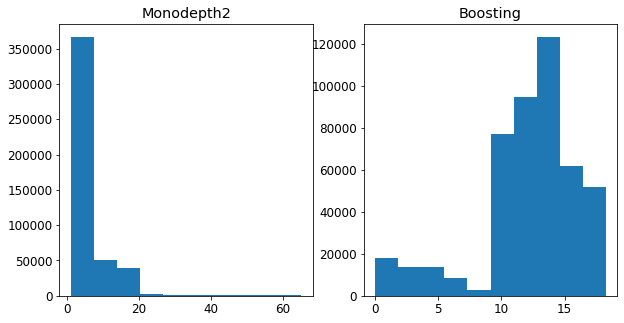

In [ ]:
importlib.reload(augmented_perspective)
monodepth_mean = np.mean(depth_map_after_monodepth2)
monodepth_var = np.var(depth_map_after_monodepth2)
monodepth_95th = np.percentile(depth_map_after_monodepth2, 95)
print("monodepth mean={}, std={}, 95th={}".format(monodepth_mean, np.sqrt(monodepth_var), monodepth_95th))
boosting_mean = np.mean(depth_map_after_boosting)
boosting_var = np.var(depth_map_after_boosting)
boosting_95th = np.percentile(depth_map_after_boosting, 95)
print("boosting mean={}, std={}, 95th={}".format(boosting_mean, np.sqrt(boosting_var), boosting_95th))
ratio_between_95th =  boosting_95th / monodepth_95th
print("boosting to monodepth ratio = {}".format(ratio_between_95th))
depth_map_after_monodepth2_normalized = augmented_perspective.normalize_depth_map(depth_map_after_monodepth2, 1)
io.imsave("outputs/kitti3_monodepth2_depth_greyscale_normalized.png", depth_map_after_monodepth2_normalized)
depth_map_after_boosting_normalized = augmented_perspective.normalize_depth_map(depth_map_after_boosting, ratio_between_95th)
io.imsave("outputs/kitti3_boosting_depth_greyscale_normalized.png", depth_map_after_boosting_normalized)
f, ax = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
draw_histogram(ax[0], depth_map_after_monodepth2_normalized)
ax[0].title.set_text('Monodepth2')
draw_histogram(ax[1], depth_map_after_boosting_normalized)
ax[1].title.set_text('Boosting')

monodepth2
[[4.9915996 5.091959  5.1896105 ... 3.1745822 3.1612873 3.1302292]
 [5.0030622 5.1008735 5.1998634 ... 3.168944  3.1556315 3.1273923]
 [5.007049  5.097818  5.19861   ... 3.1896892 3.1729252 3.1429288]
 ...
 [1.812802  1.815973  1.8119583 ... 1.7320216 1.7306013 1.7260487]
 [1.803794  1.8066583 1.8028905 ... 1.7183156 1.7166754 1.711133 ]
 [1.7973248 1.7993972 1.7960956 ... 1.709864  1.7082198 1.7020305]]
[[ 9.917125    9.988286   10.03448    ...  9.021552    8.981721
   9.052796  ]
 [ 9.980614    9.98319    10.00595    ...  8.966002    9.048451
   9.1786585 ]
 [ 9.909709    9.970809   10.018232   ...  8.961119    8.960926
   8.994538  ]
 ...
 [ 1.2288451   1.1841699   1.1697496  ...  3.2218156   3.2128427
   3.190813  ]
 [ 1.1787642   1.0767674   1.0361034  ...  3.1709752   3.1501334
   3.2261431 ]
 [ 1.0589986   1.0006146   0.97379535 ...  3.117837    3.0487945
   3.0058825 ]]
boosting


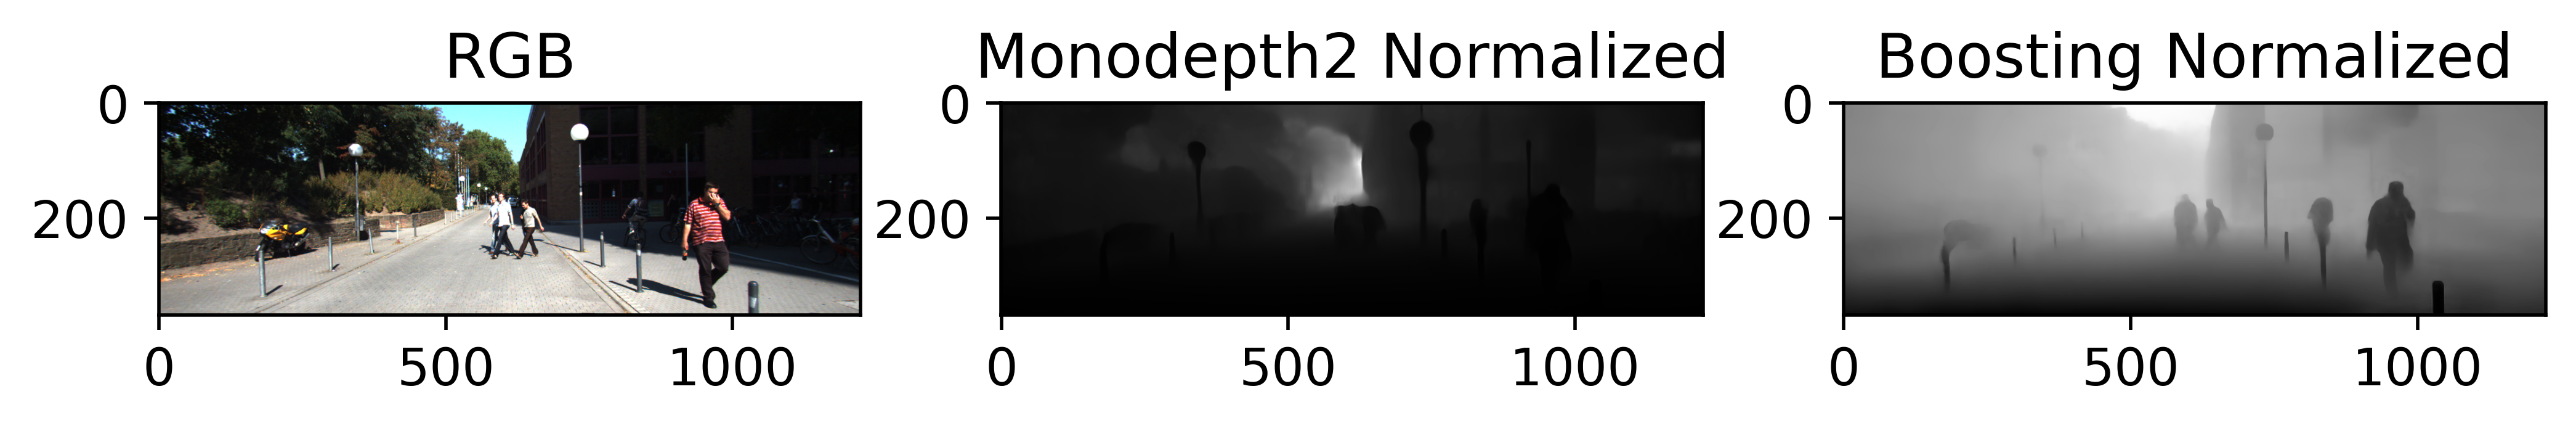

In [ ]:
f, ax = plt.subplots(1, 3, dpi=500)
print("monodepth2")
print(depth_map_after_monodepth2_normalized)
print(depth_map_after_boosting_normalized)
print("boosting")
ax[0].imshow(original_image)
ax[0].title.set_text('RGB')
ax[1].imshow(depth_map_after_monodepth2_normalized, cmap='gray')
ax[1].title.set_text('Monodepth2 Normalized')
ax[2].imshow(depth_map_after_boosting_normalized, cmap='gray')
ax[2].title.set_text('Boosting Normalized')

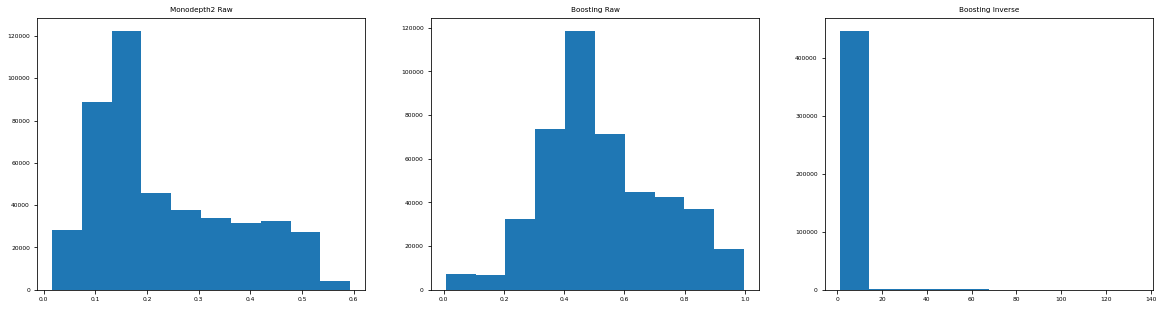

In [ ]:
raw_depth_map_after_monodepth2 = np.load("outputs/kitti2_monodepth2_resized_disp.npy")
raw_depth_map_after_boosting = np.load("outputs/kitti2_boosting_depth_raw.npy")
inverse_depth_map_after_boosting = np.load("outputs/kitti2_boosting_depth_inverse.npy")

f, ax = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 6})
draw_histogram(ax[0], raw_depth_map_after_monodepth2)
ax[0].title.set_text('Monodepth2 Raw')
draw_histogram(ax[1], raw_depth_map_after_boosting)
ax[1].title.set_text('Boosting Raw')
draw_histogram(ax[2], inverse_depth_map_after_boosting)
ax[2].title.set_text('Boosting Inverse')

Now run this against all images in asset/ folder

In [ ]:
import os
importlib.reload(depth_model)
argv = ["runner.py", "--image_path", "assets/", "--device", device]
depth_model.run_depth_model(argv)

before ['runner.py', '--image_path', 'assets/kitti2.png', '--boosting']
after ['runner.py', '--image_path', 'assets/', '--device', 'cuda']
Namespace(boosting=True, device='cuda', image_files=None, image_path='../../assets/', model_name='mono_1024x320', monodepth2=True, output_path='../../outputs/')
-> Loading model from  models/mono_1024x320
   Loading pretrained encoder
   Loading pretrained decoder
Reading images from ../../assets/
-> Predicting on 5 test images
input_image.shape:  torch.Size([1, 3, 320, 1024])
disp.shape:  torch.Size([1, 1, 320, 1024])
disp_resized.shape:  torch.Size([1, 1, 375, 1242])
scaled_disp.shape:  torch.Size([1, 1, 320, 1024])
[[6.1544385 6.139176  6.1393795 ... 3.60067   3.567287  3.552418 ]
 [6.1598825 6.1421247 6.1450253 ... 3.6050012 3.5665207 3.5501053]
 [6.170287  6.152244  6.152698  ... 3.6279972 3.5890226 3.5726845]
 ...
 [1.8739542 1.8803006 1.8860852 ... 1.8787636 1.8762622 1.8726081]
 [1.8566328 1.8620285 1.8669531 ... 1.8679655 1.8654239 1.861895

Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_main


start processing
processing image 0 : kitti1
	 wholeImage being processed in : 2304
 	 	 DEBUG| GPU THRESHOLD REACHED 2304 ---> 1568
Adjust factor is: 1.0
Selecting patchs ...
Target resolution:  (1391, 4608, 3)
Dynamicly change merged-in resolution; scale: 0.2695902228612509
	 Resulted depthmap res will be : (375, 1242)
patchs to process: 24
	 processing patch 0 | [388   0 362 362]
	 processing patch 1 | [466   0 362 362]
	 processing patch 2 | [543   0 362 362]
	 processing patch 3 | [621   0 362 362]
	 processing patch 4 | [699   0 362 362]
	 processing patch 5 | [776   0 362 362]
	 processing patch 6 | [854   0 362 362]
	 processing patch 7 | [293  60 242 242]
	 processing patch 8 | [457 147 224 224]
	 processing patch 9 | [535 147 224 224]
	 processing patch 10 | [613 147 224 224]
	 processing patch 11 | [690 147 224 224]
	 processing patch 12 | [768 147 224 224]
	 processing patch 13 | [845 147 224 224]
	 processing patch 14 | [923 147 224 224]
	 processing patch 15 | [1001  147 

In [ ]:
importlib.reload(augmented_perspective)

argv = ["runner.py", "--image_path", "assets/kitti1.png", "--monodepth2"]
augmented_perspective.run_augmented_perspective(argv, ANGLE=25, FRAMES=30, TRANSLATION=-0.6, SCALE_RATIO=100, output_directory="kitti1_monodepth2_gif")

argv = ["runner.py", "--image_path", "assets/kitti2.png", "--monodepth2"]
augmented_perspective.run_augmented_perspective(argv, ANGLE=25, FRAMES=30, TRANSLATION=-0.6, SCALE_RATIO=100, output_directory="kitti2_monodepth2_gif")

argv = ["runner.py", "--image_path", "assets/kitti3.png", "--monodepth2"]
augmented_perspective.run_augmented_perspective(argv, ANGLE=25, FRAMES=30, TRANSLATION=-0.6, SCALE_RATIO=100, output_directory="kitti3_monodepth2_gif")

argv = ["runner.py", "--image_path", "assets/kitti4.png", "--monodepth2"]
augmented_perspective.run_augmented_perspective(argv, ANGLE=25, FRAMES=30, TRANSLATION=-0.6, SCALE_RATIO=100, output_directory="kitti4_monodepth2_gif")

argv = ["runner.py", "--image_path", "assets/kitti5.png", "--monodepth2"]
augmented_perspective.run_augmented_perspective(argv, ANGLE=25, FRAMES=30, TRANSLATION=-0.6, SCALE_RATIO=100, output_directory="kitti5_monodepth2_gif")

# argv = ["runner.py", "--image_path", "assets/kitti2.png", "--boosting"]
# augmented_perspective.run_augmented_perspective(argv, ANGLE=25, FRAMES=30, TRANSLATION=-0.3, SCALE_RATIO=100, output_directory="kitti2_boosting_gif")

RT
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Start reprojection
Saving image (375, 1242, 3) to kitti1_monodepth2_gif/kitti1_monodepth2_depth_reprojected_0.png
Time taken: 8.603975296020508 seconds
RT
 [[ 0.99988681  0.          0.01504537 -0.02068966]
 [ 0.          1.          0.          0.        ]
 [-0.01504537  0.          0.99988681  0.        ]
 [ 0.          0.          0.          1.        ]]
Start reprojection
Saving image (375, 1242, 3) to kitti1_monodepth2_gif/kitti1_monodepth2_depth_reprojected_1.png
Time taken: 9.481127262115479 seconds
RT
 [[ 0.99954727  0.          0.03008734 -0.04137931]
 [ 0.          1.          0.          0.        ]
 [-0.03008734  0.          0.99954727  0.        ]
 [ 0.          0.          0.          1.        ]]
Start reprojection
Saving image (375, 1242, 3) to kitti1_monodepth2_gif/kitti1_monodepth2_depth_reprojected_2.png
Time taken: 9.399924039840698 seconds
RT
 [[ 0.99898146  0.          0.0451225  -0.06206897]
 [ 0. 